The objective is to identify the person who had the best probability of surviving in Titanic disaster.
On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.
I have test and train datasets.

Import some important libraries. Will use metrics for evaluating sklearn model's accuracy.

In [1]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Observing and describing data, searching some NaN values, differences. Collecting information about dependencies.

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

In [6]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
print(train_df[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by = 'Survived', ascending=False))
print(train_df[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by = 'Survived', ascending=False))
print(train_df[['SibSp', 'Survived']].groupby(['SibSp']).mean().sort_values(by = 'Survived', ascending=False))
print(train_df[['Parch', 'Survived']].groupby(['Parch']).mean().sort_values(by = 'Survived', ascending=False))

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363
        Survived
Sex             
female  0.742038
male    0.188908
       Survived
SibSp          
1      0.535885
2      0.464286
0      0.345395
3      0.250000
4      0.166667
5      0.000000
8      0.000000
       Survived
Parch          
3      0.600000
1      0.550847
2      0.500000
0      0.343658
5      0.200000
4      0.000000
6      0.000000


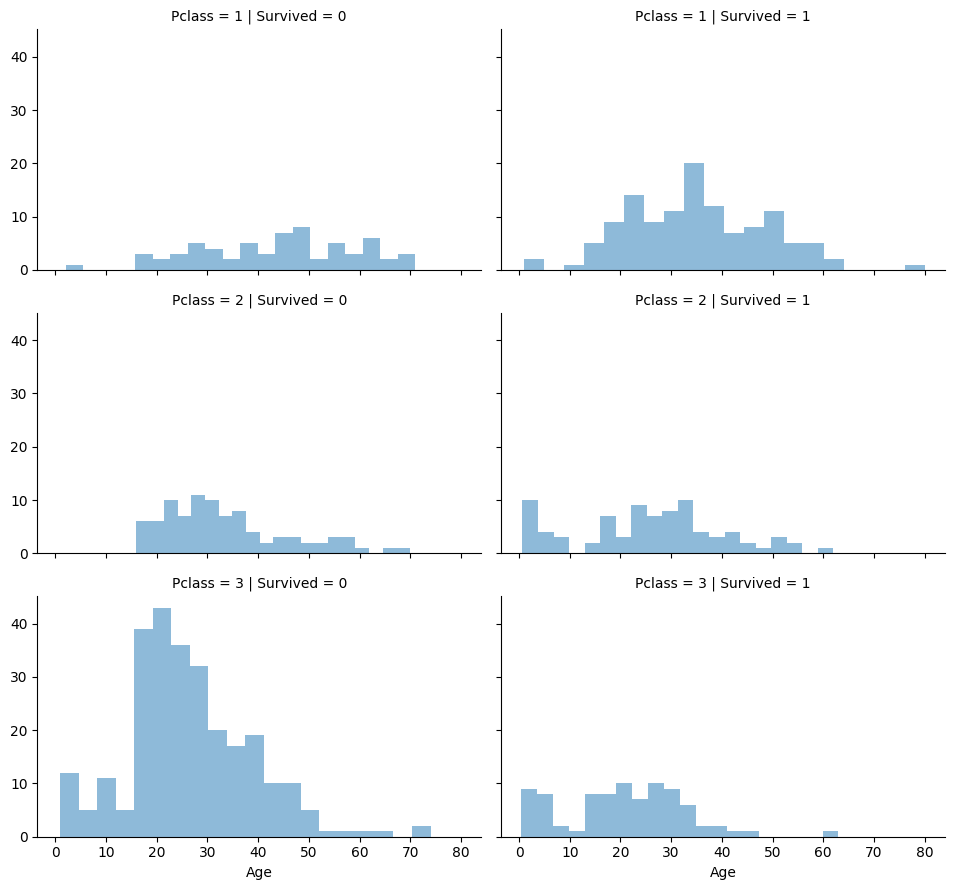

In [8]:
grid = sns.FacetGrid(train_df, col = 'Survived', row = 'Pclass', aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = 0.5, bins = 20)
grid.add_legend()

In [9]:
train_df = train_df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [test_df, train_df]
train_df.shape, test_df.shape, combine[1].shape, combine[0].shape

((891, 10), (418, 9), (891, 10), (418, 9))

In [10]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
pd.crosstab(train_df['Title'], train_df['Sex'])    

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [11]:
for datset in combine:
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Countess', 'Don', 'Dr', 'Major', 'Jonkheer', 'Lady', 'Rev', 'Sir', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train_df[['Title', 'Survived']].groupby(['Title']).mean().sort_values(by = 'Survived', ascending=False)


,Survived
Title,
Mrs,0.793651
Miss,0.702703
Master,0.575000
Rare,0.347826
Mr,0.156673


In [12]:
title_mapping = {'Mr':1, 'Miss':2, 'Mrs':3, 'Master':4, 'Rare':5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [13]:
train_df = train_df.drop(['PassengerId', 'Name'], axis = 1)
test_df = test_df.drop(['Name'], axis = 1)
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 9))

In [14]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female':1, 'male':0}).astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [15]:
guess_ages = np.zeros((2,3))
guess_ages
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),\
                    'Age'] = guess_ages[i,j]

    dataset['Age'] = dataset['Age'].astype(int)

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [16]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [17]:
train_df = train_df.drop(['AgeBand'], axis=1)
combine = [train_df, test_df]
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [18]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [19]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()
train_df = train_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train_df, test_df]

train_df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [20]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train_df.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

train_df.head()
print(test_df.head())

   PassengerId  Pclass  Sex  Age     Fare  Embarked  Title  IsAlone  Age*Class
0          892       3    0    2   7.8292         2    1.0        1          6
1          893       3    1    2   7.0000         0    3.0        0          6
2          894       2    0    3   9.6875         2    1.0        1          6
3          895       3    0    1   8.6625         0    1.0        1          3
4          896       3    1    1  12.2875         0    3.0        0          3


In [21]:
test_df['Fare'].fillna(test_df['Fare'].dropna().median(), inplace=True)
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)
train_df = train_df.drop(['FareBand'], axis=1)
combine = [train_df, test_df]


Now dataset ready for applying predictive modelling algorithms. We want to identify relationship between output(Survived or not) and with other variables and features(Age, Sex, etc). We are perfoming supervised/unsupervised learning, using these algorithms:
-Logistic Regression
-KNN or K-Nearest Neighbors
-Support VEctor Machines
-Naive Bayes classifier
-Perceptron
-Decision Tree
-Random Forest
-Perception
-Artificial Neural network
-RVM or Relevance Vector Machine

In [22]:
X_train = train_df.drop('Survived', axis = 1)
y_train = train_df['Survived']
X_test = test_df.drop('PassengerId', axis = 1).copy()
X_train.shape, y_train.shape, X_test.shape


((891, 8), (891,), (418, 8))

In [23]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, y_train)*100, 2)
acc_log

79.35

In [24]:
coeff_df = pd.DataFrame(train_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df['Correlation'] = pd.Series(logreg.coef_[0])
coeff_df.sort_values(by = 'Correlation', ascending = False)

,Feature,Correlation
1,Sex,2.180608
5,Title,0.414663
4,Embarked,0.203057
2,Age,0.167800
6,IsAlone,0.075803
3,Fare,-0.069708
7,Age*Class,-0.190146
0,Pclass,-0.894657


In [25]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, y_train)*100, 2)
acc_svc

78.34

In [26]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(X_train, y_train)
Y_pred = KNN.predict(X_test)
acc_knn = round(KNN.score(X_train, y_train) * 100, 2)
acc_knn

85.75

In [27]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian

72.05

In [28]:
prp = Perceptron()
prp.fit(X_train, y_train)
Y_pred = prp.predict(X_test)
acc_prp = round(prp.score(X_train, y_train) * 100, 2)
acc_prp

77.33

In [29]:
Lsvc = LinearSVC()
Lsvc.fit(X_train, y_train)
Y_pred = Lsvc.predict(X_test)
acc_lsvc = round(Lsvc.score(X_train, y_train) * 100, 2)
acc_lsvc

c:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


78.45

In [30]:
sgdc = SGDClassifier()
sgdc.fit(X_train, y_train)
Y_pred = sgdc.predict(X_test)
acc_sgdc = round(sgdc.score(X_train, y_train) * 100, 2)
acc_sgdc

68.35

In [31]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_tree = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_tree

87.54

In [32]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
acc_forest = round(random_forest.score(X_train, y_train) * 100, 2)
acc_forest

87.54

In [33]:
models = pd.DataFrame({'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
                                'Random Forest', 'Naive Bayes', 'Perceptron', 
                                'Stochastic Gradient Decent', 'Linear SVC', 
                                'Decision Tree'],
                       'Score': [acc_svc, acc_knn, acc_log, 
                                 acc_forest, acc_gaussian, acc_prp, 
                                 acc_sgdc, acc_lsvc, acc_tree]       
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Random Forest,87.54
8,Decision Tree,87.54
1,KNN,85.75
2,Logistic Regression,79.35
7,Linear SVC,78.45
0,Support Vector Machines,78.34
5,Perceptron,77.33
4,Naive Bayes,72.05
6,Stochastic Gradient Decent,68.35


In [34]:
submission = pd.DataFrame({'PassengerId' : test_df['PassengerId'], 'Survived' : Y_pred})
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
